In [138]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
import os

# Analysis of the competition network
1. Load data
2. give the cluster of nodes
3. plot the network
4. caculate the competition of netork across cluster

In [139]:
USE_SIMPLE_DATA = False

In [140]:
# change the path 
path = "/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes"
os.chdir(path)


In [141]:
# load the data
departmentDict = {}
with open("./rawData/cross/university.json") as f:
    universityDict = json.load(f)
for Ukey, Uvalue in universityDict.items():
    with open(f"./rawData/cross/{Ukey}.json") as f:
        department = json.load(f)
    for Skey,Svalue in department.items():
        departmentDict[f"{Ukey}_{Skey}"] = Svalue



In [142]:
# transfer to networkx Graph
with open("./rawData/cross/students.json") as f:
    studentDict = json.load(f)
cluster  = dict()
G = nx.Graph()
it = 0
for key,val in departmentDict.items():
    G.add_node(val,cnname=key)
for dep in studentDict:
    for head, tail in dep.items():
        for link,weight  in tail.items():
            G.add_edge(head,link,weight=weight) 

In [143]:
# load the cluster data set
os.chdir("/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes")
with open(f"./processedData/{'simplify_tsneCluster.csv' if USE_SIMPLE_DATA else 'raw_tsneCluster.csv'}") as f:
    clusterData = pd.read_csv(f)
clusterMap = {f"{row['學系代碼']:06d}":row['cluster'] for idx,row in clusterData.iterrows()}

Note:  cluster 8 means other

In [144]:
# add cluster to the graph
for node in G.nodes:
    node_ = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
    try:
        G.nodes[node]['cluster'] = clusterMap[node_]
    except:
        G.nodes[node]['cluster'] = 8
    try:
        G.nodes[node]['code'] = node_
    except:
        G.nodes[node]['code'] = None

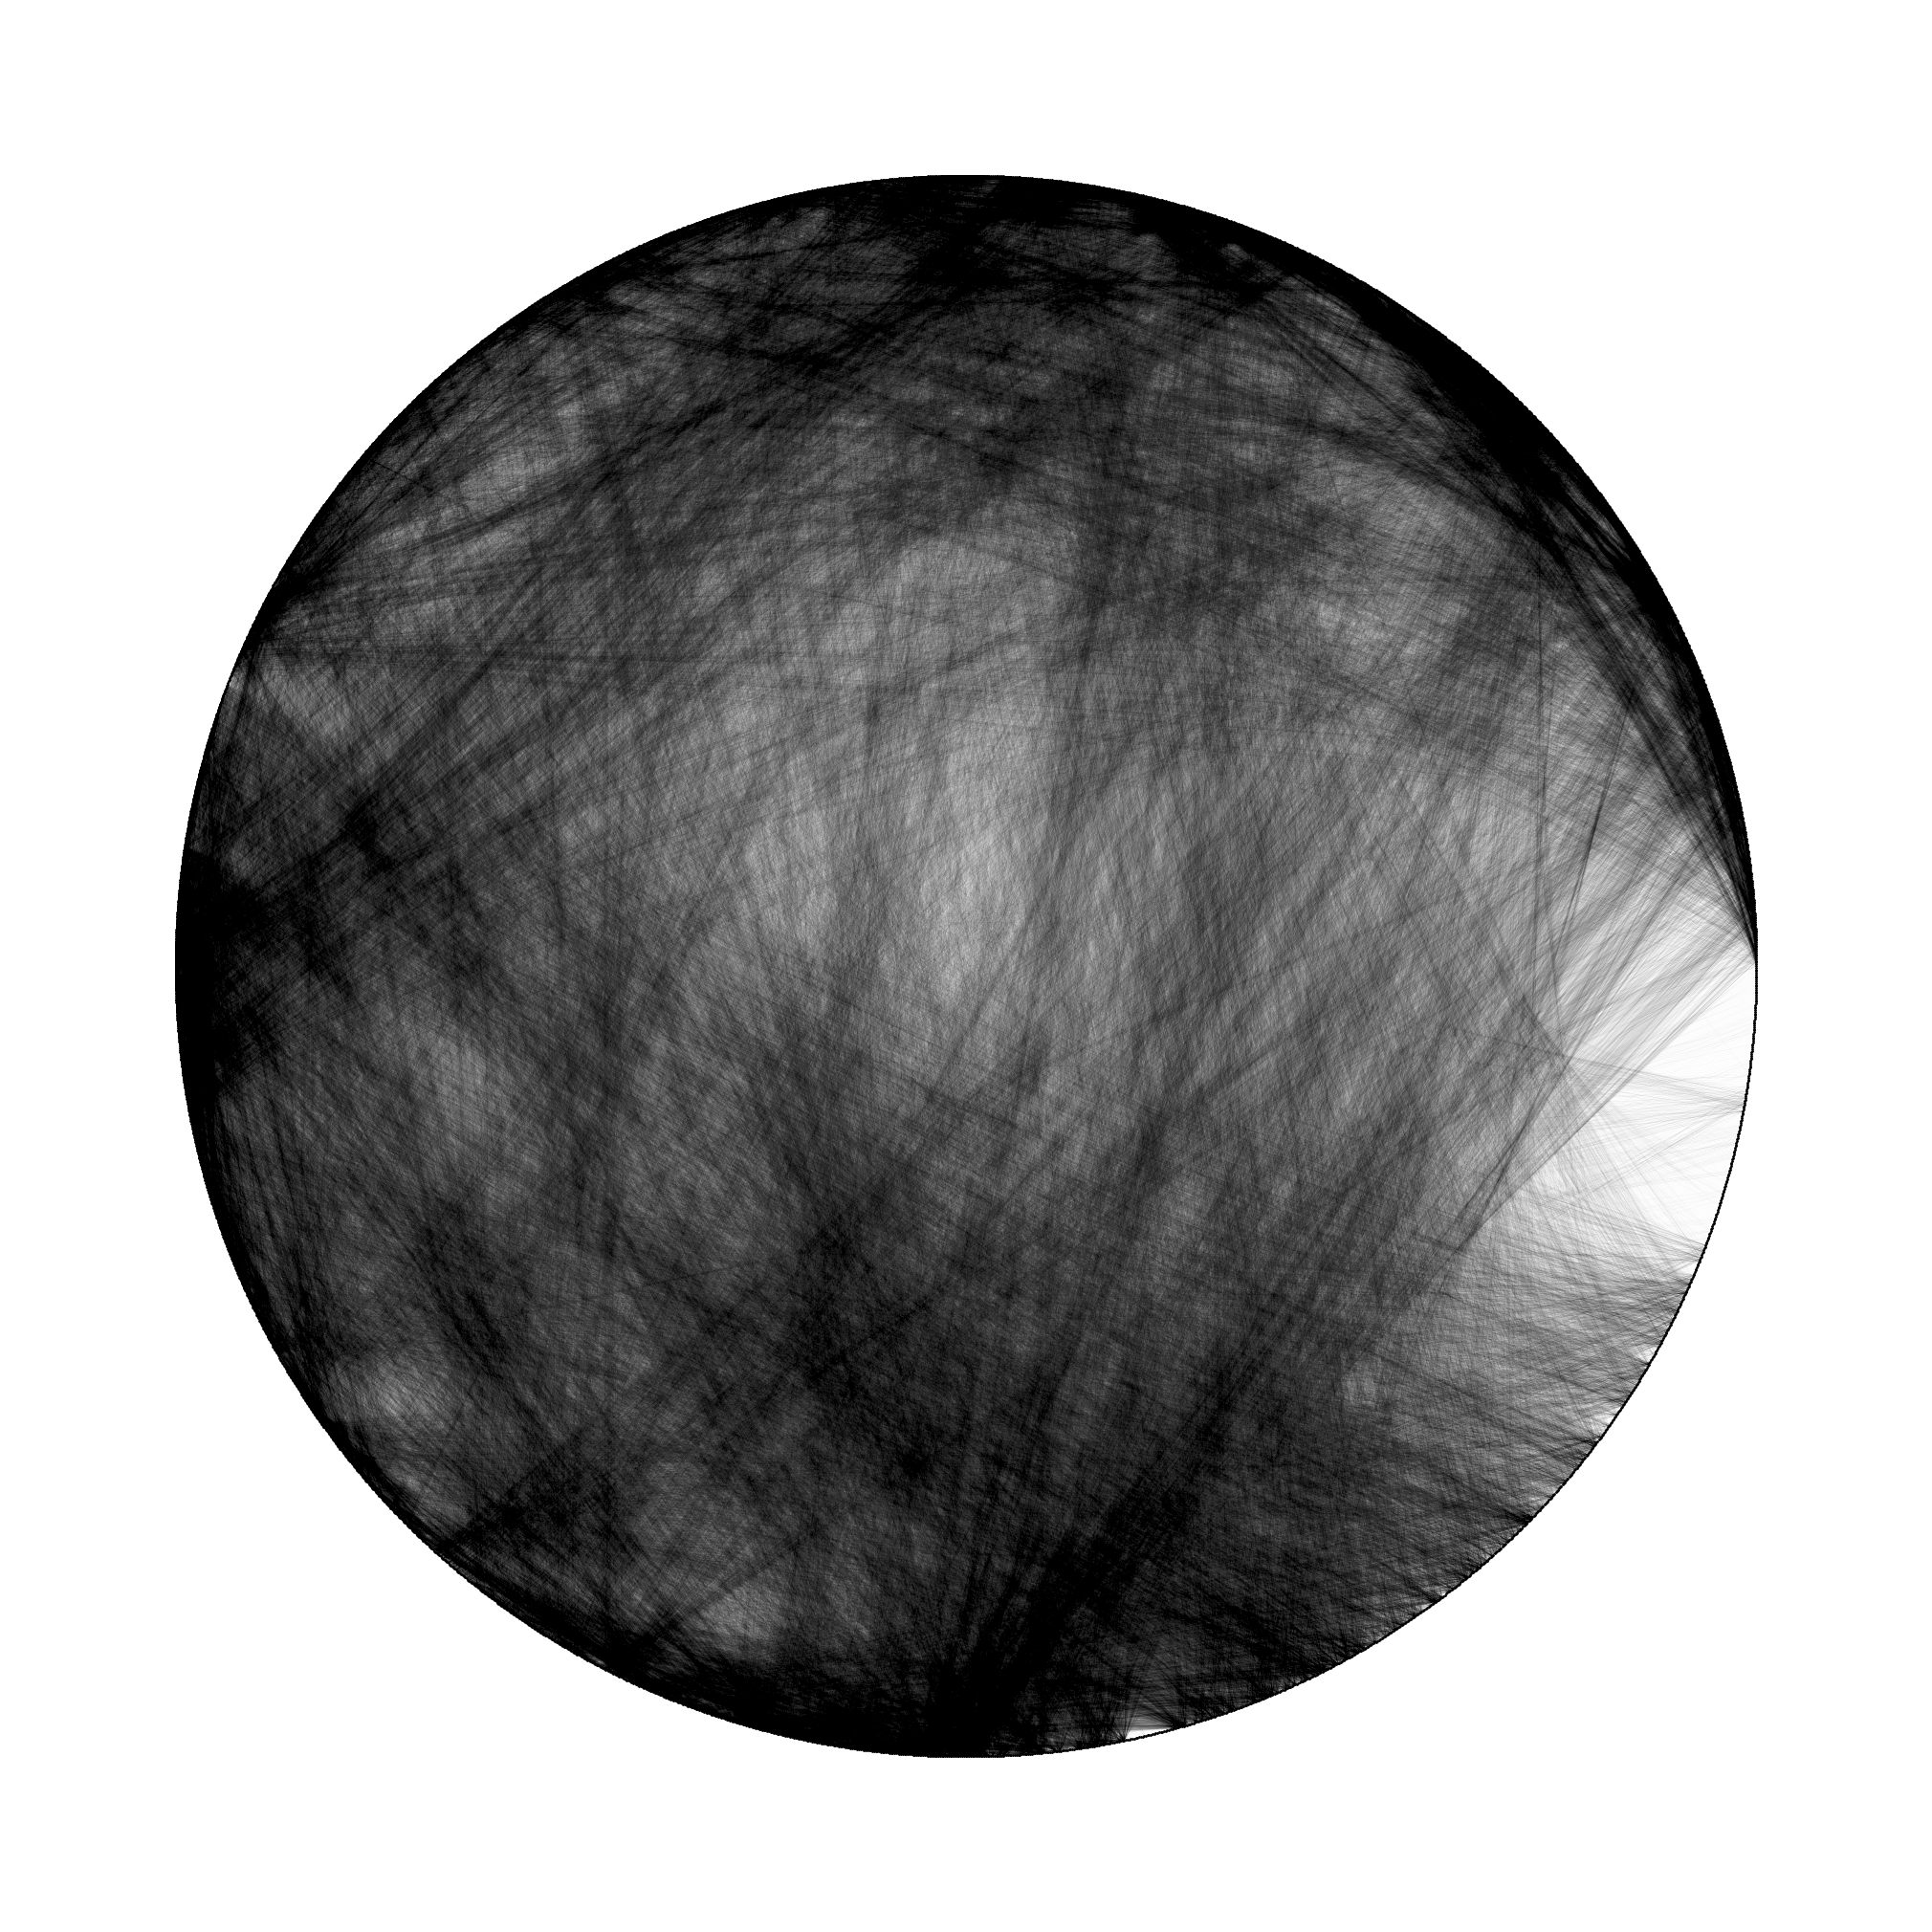

In [145]:
# draw the network
plt.figure(figsize=(20,20))

pos = nx.circular_layout(G)

options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 0.01
}
# Draw custom labels
nx.draw(G, with_labels=False,pos=pos,**options)

plt.savefig(f"./pics/{'simpCompetitionNetwork.png' if USE_SIMPLE_DATA else 'rawCompetitionNetwork.png'}")

001012
001022
001032
001042
001052
001062
001072
001082
001092
001102
001112
001122
001132
001142
001152
001162
001172
001182
001192
001202
001212
001222
001232
001242
001252
001262
001272
001282
001292
001302
001312
001322
001332
001342
001352
001362
001372
001382
001392
001402
001412
001422
001432
001442
001452
001462
001472
001482
001492
001502
001512
001522
001532
001542
001552
001562
001572
001582
001592
001602
001612
001622
001632
001642
001652
001662
001672
001682
001692
001702
001712
002012
002022
002032
002042
002052
002062
002072
002082
002092
002102
002112
002122
002132
002142
002152
002162
002172
002182
002192
002202
002212
002222
002232
002242
002252
002262
002272
002282
002292
002302
002312
002322
002332
002342
002352
002362
002372
002382
002392
002402
002412
002422
003012
003022
003032
003042
003052
003062
003072
003082
003092
003102
003112
003122
003132
003142
003152
003162
003172
003182
003192
003202
003212
003222
003232
003242
003252
003262
003272
003282
003292
003302

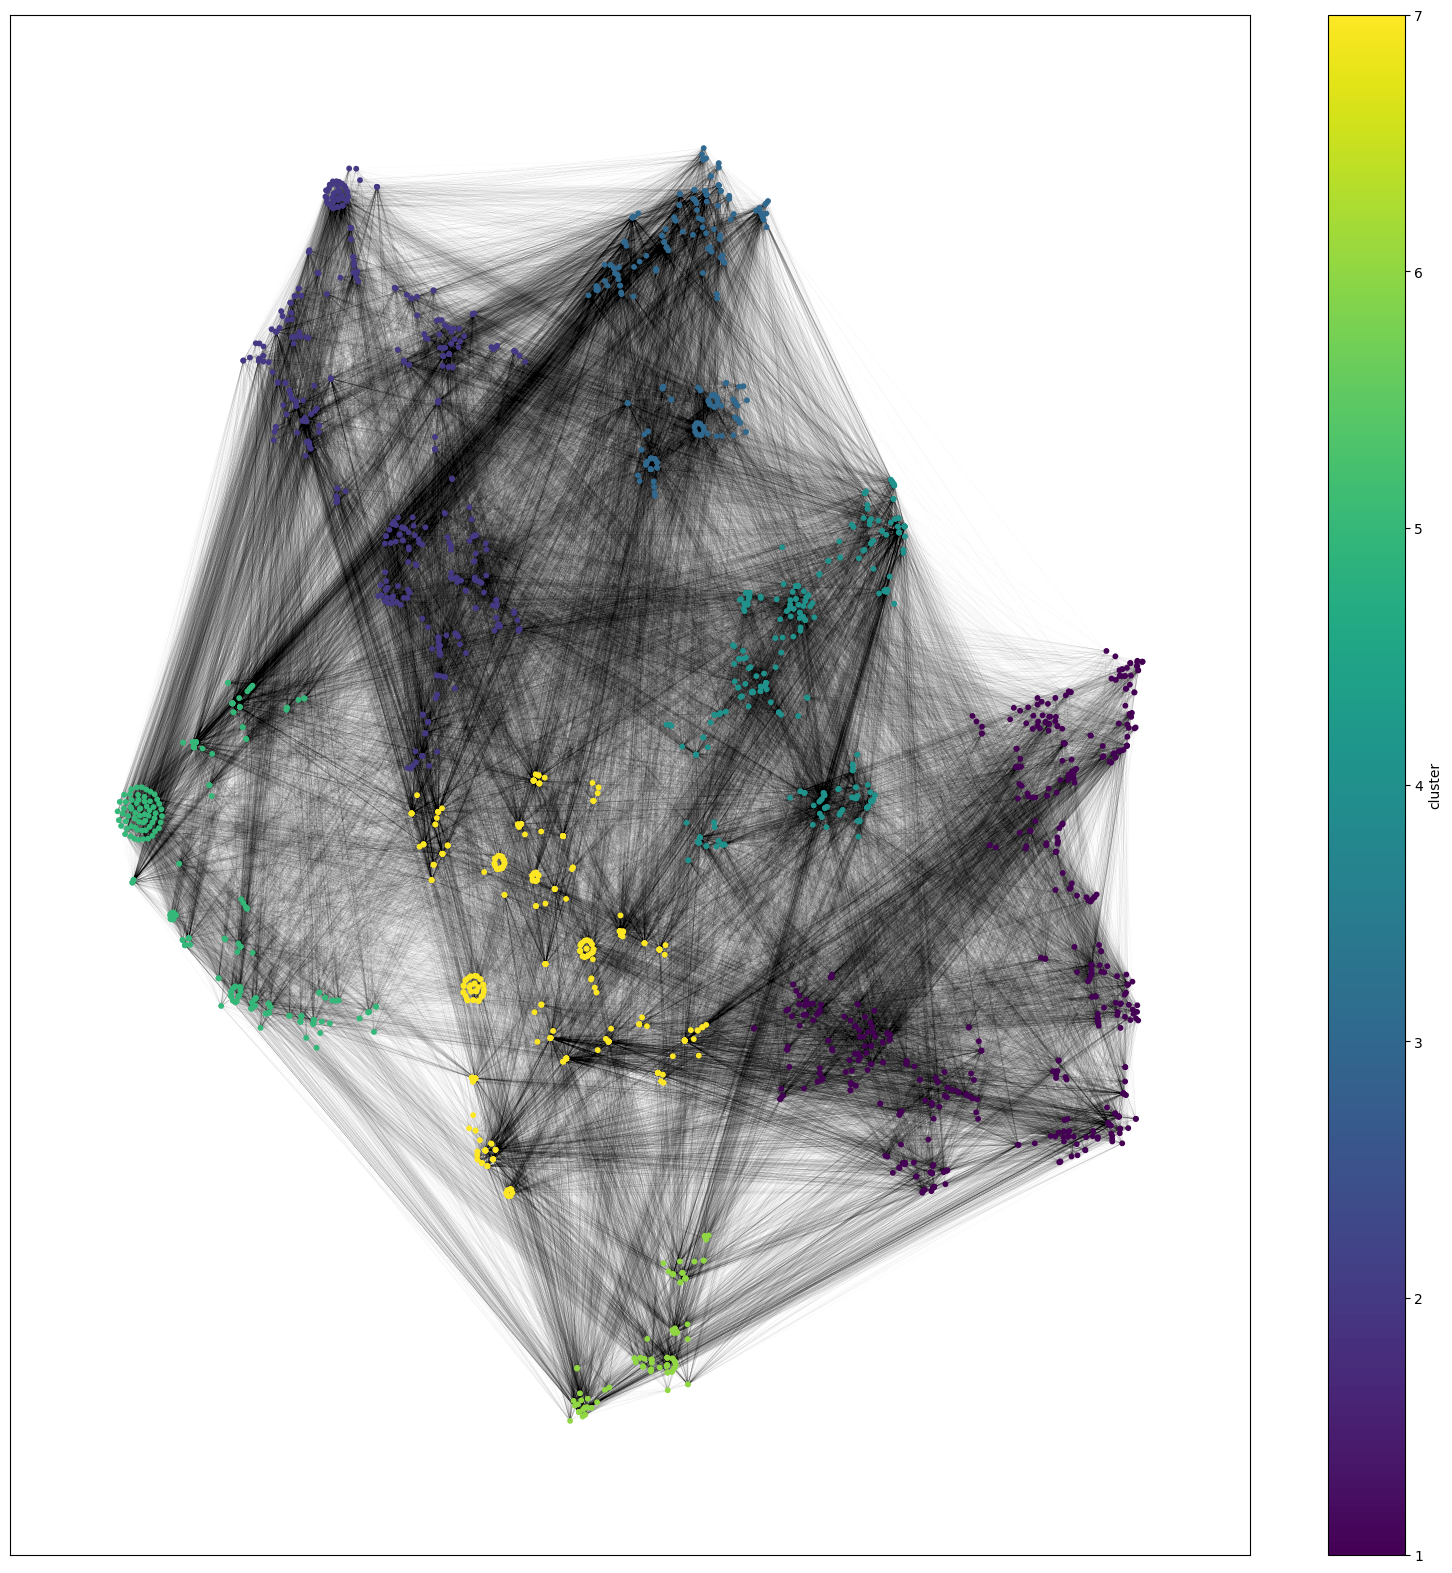

In [146]:
# draw the network with cluster and pos
Gtemp = G.copy()
pos = nx.circular_layout(Gtemp)
rmlist = []
for node in Gtemp.nodes:
    node_ = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
    print(node_)
    try:
        pos.update({node:np.array([clusterData.loc[clusterData['學系代碼'] == int(node_),'tsnepos1'].values[0],clusterData.loc[clusterData['學系代碼'] == int(node_),'tsnepos2'].values[0]])})
        Gtemp.nodes[node]['posx'] = clusterData.loc[clusterData['學系代碼'] == int(node_),'tsnepos1'].values[0]
        Gtemp.nodes[node]['posy'] = clusterData.loc[clusterData['學系代碼'] == int(node_),'tsnepos2'].values[0]
    except:
        rmlist.append(node)
for node in rmlist:
    Gtemp.remove_node(node)
    
plt.figure(figsize=(20,20))
options = {
    'node_color': [Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes],
    'node_size': 10,
    'width': 0.01,
    'cmap':'tab10',
    'labels':{node:Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes}
}
node_options = {
    'node_color': [Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes],
    'node_size': 10,
    'cmap':'viridis'
}
edge_options = {
    'width': 0.01
}
    
# Draw custom labels
linkG = nx.draw_networkx_nodes(Gtemp,pos=pos,**node_options)
plt.colorbar(linkG,
             label='cluster')
nx.draw_networkx_edges(Gtemp,pos=pos,**edge_options)
plt.savefig(f"./pics/{'simpCompetitionNetworkCluster.png' if USE_SIMPLE_DATA else 'rawCompetitionNetworkCluster.png'}",dpi = 300)
#nx.write_gexf(Gtemp,f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_competitionNetwork.gexf")

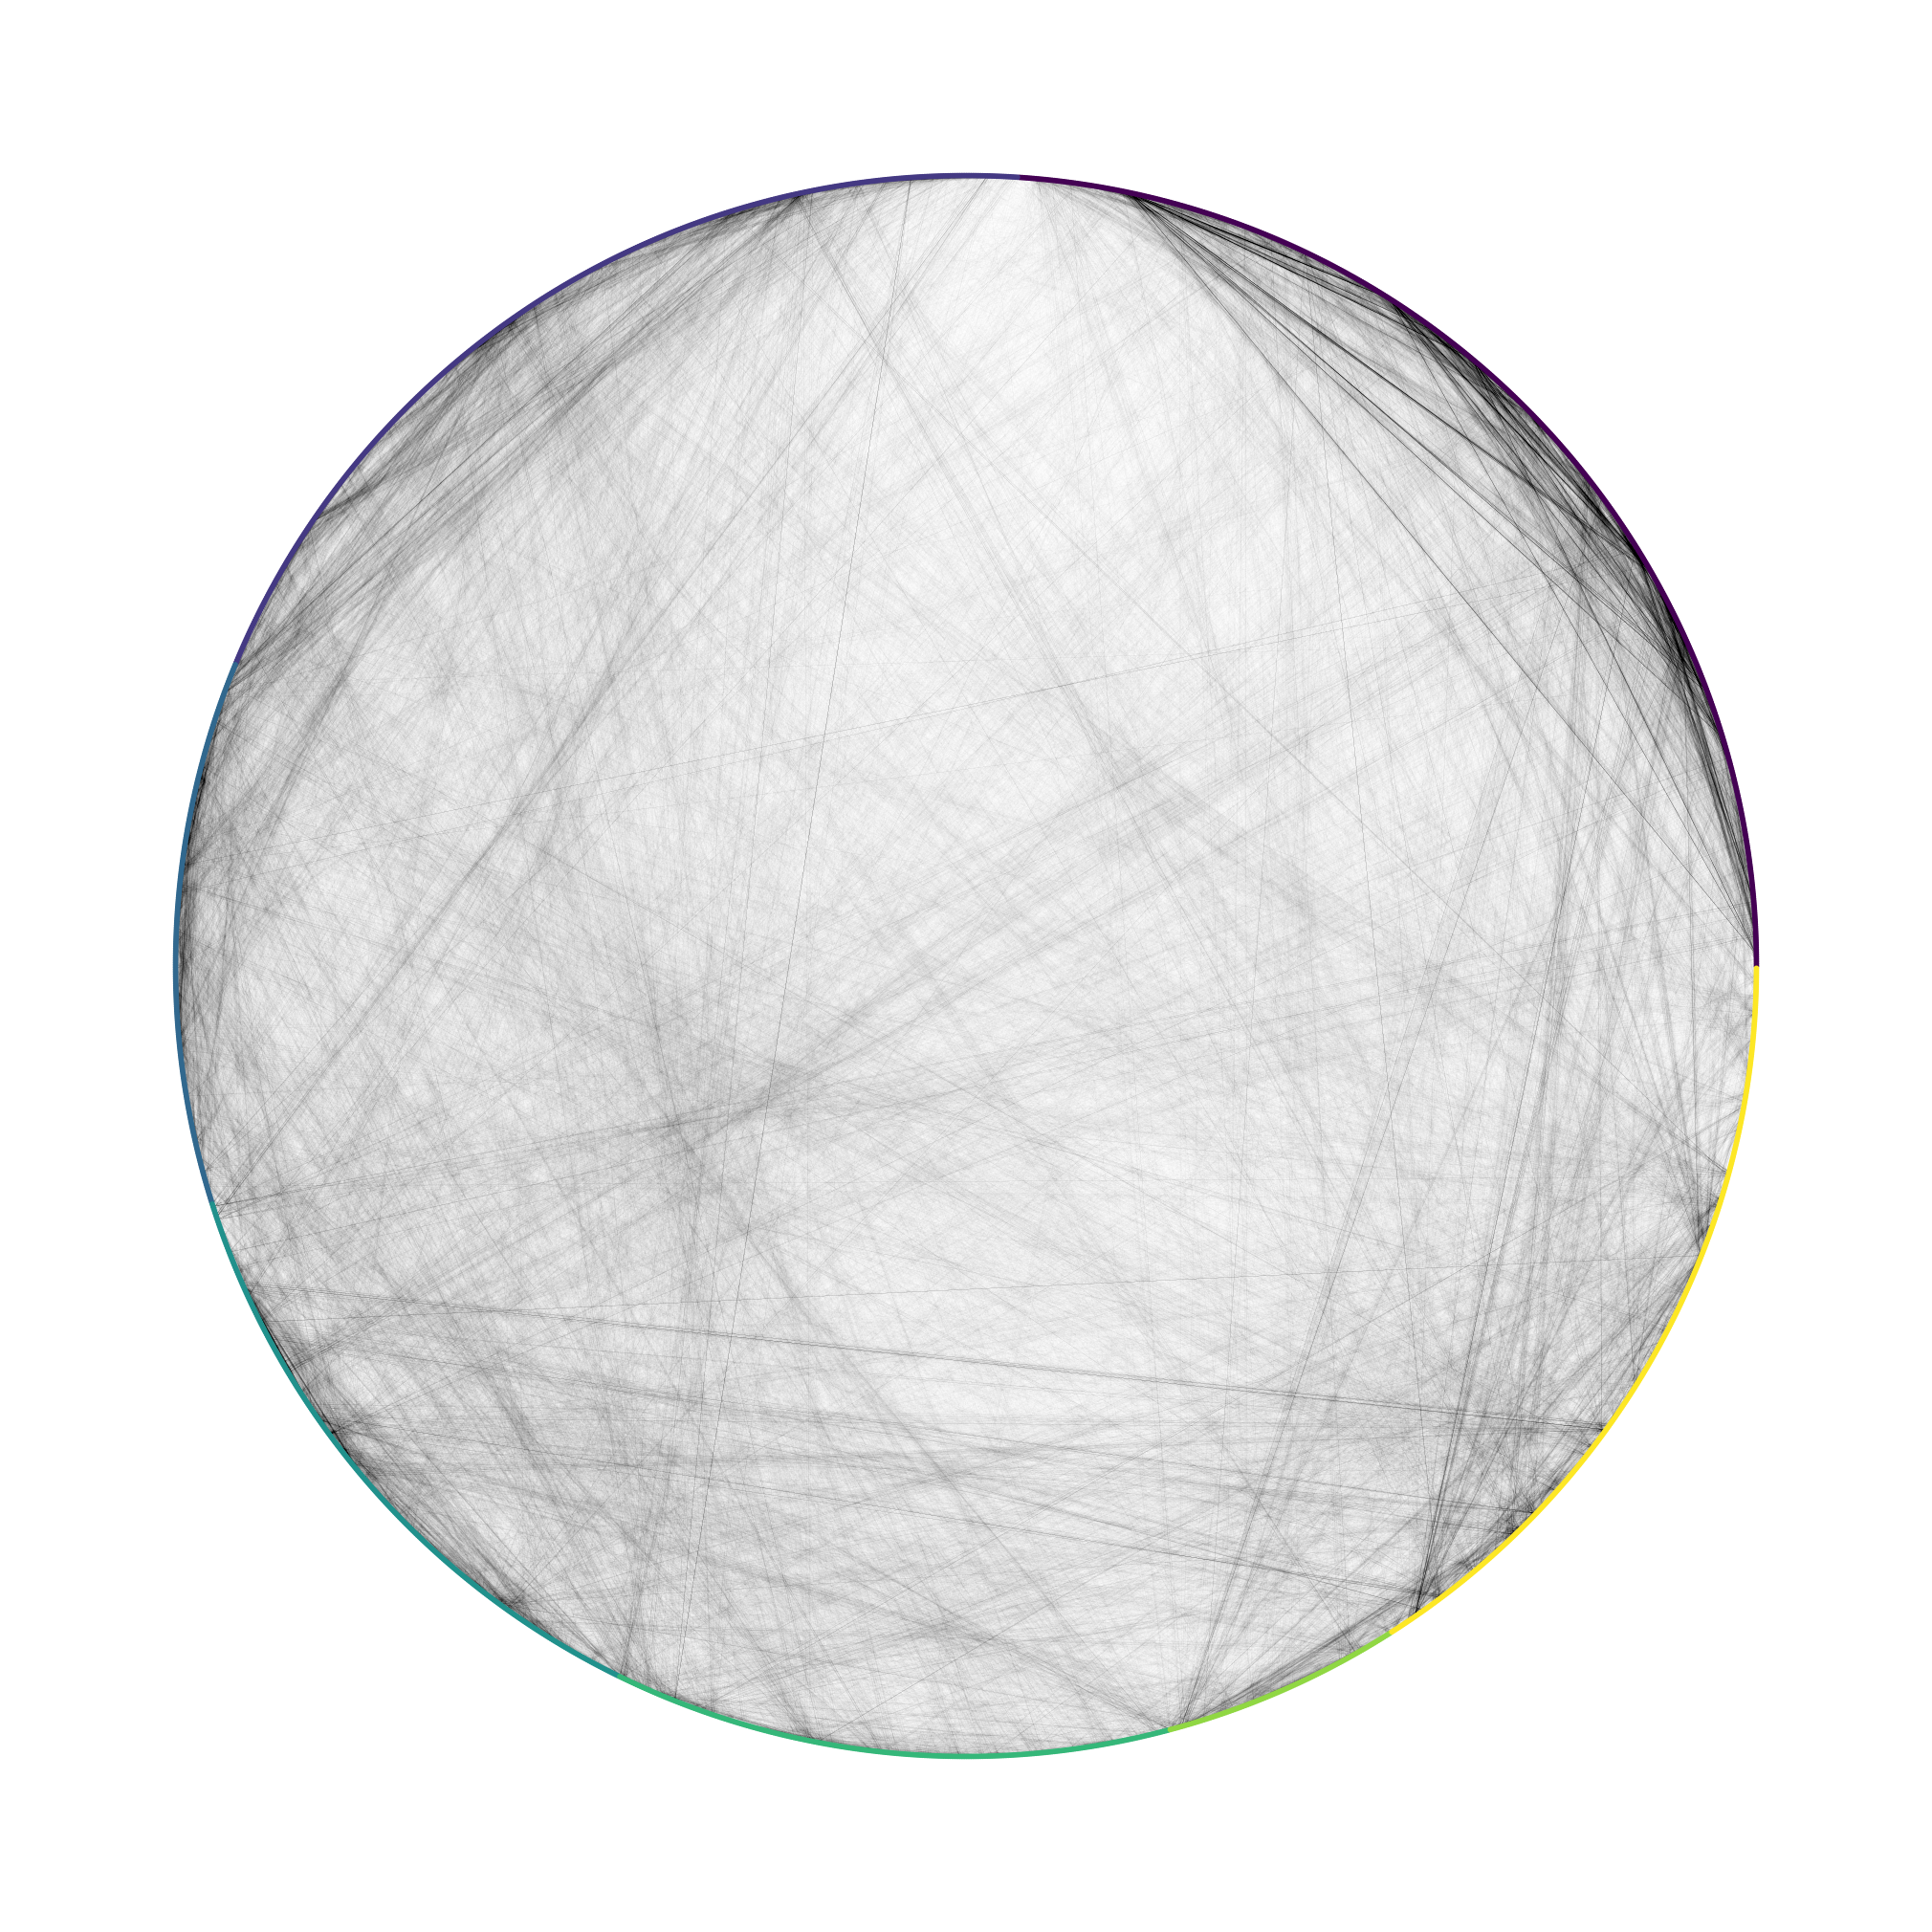

In [147]:
H = nx.Graph()

for clust in range(1,8):
    for node in Gtemp.nodes:
        if Gtemp.nodes[node]['cluster'] == clust:
            H.add_node(node,cluster=clust)
for edg in Gtemp.edges:
    H.add_edge(edg[0],edg[1],weight=Gtemp.edges[edg]['weight'])
            

plt.figure(figsize=(20,20))

pos = nx.circular_layout(H)

options = {
    'node_color': [H.nodes[node]['cluster'] for node in H.nodes],
    'node_size': 10,
    'width': [H.edges[edge]['weight']/1000 for edge in H.edges],
}
# Draw custom labels
nx.draw(H, with_labels=False,pos=pos,**options)

plt.savefig(f"./pics/{'simpCompetitionNetwork.png' if USE_SIMPLE_DATA else 'rawCompetitionNetwork.png'}")

# average connection strength between cluster

In [148]:
# caculate the cluster transfer matrix
clusterTransfer = [[[] for i in range(8)] for j in range(7)]
for node in G.nodes():
    sumofconnection = 0
    temp = [[] for _ in range(8)]
    if int(G.nodes[node]['cluster']) != 8:
        for neighbor in G.neighbors(node):
            sumofconnection += G.edges[node,neighbor]['weight']
            temp[G.nodes[neighbor]['cluster'] - 1].append(G.edges[node,neighbor]['weight'])
        for i in range(8):
            if len(temp[i]) == 0:
                temp[i] = 0
            temp[i] = np.nansum(temp[i])
            if temp[i] not in [np.nan,np.inf,-np.inf]:
                clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i])
            

# chi test

In [149]:
clusterMatrix = np.zeros((7,8))
for i in range(7):
    for j in range(8):
        clusterMatrix[i][j] = np.nansum(clusterTransfer[i][j])
        
# chi test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(clusterMatrix)
print(f"chi2: {chi2}, p: {p}, dof: {dof}")

chi2: 418803.8281536637, p: 0.0, dof: 42


<Figure size 3000x3000 with 0 Axes>

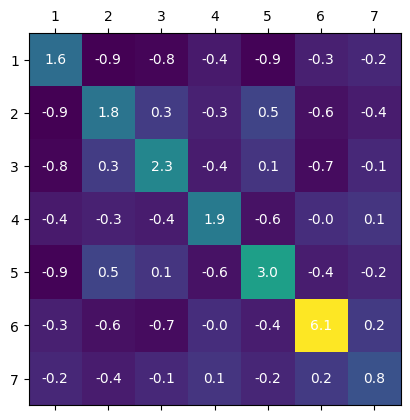

In [150]:
# highlight the block are significant
clusterMatrixNo7 = clusterMatrix[:,:7].copy()
rowExp = [np.sum(clusterMatrix[row,0:7])/np.sum(clusterMatrixNo7) for row in range(7)]
colExp = [np.sum(clusterMatrix[:,col])/np.sum(clusterMatrixNo7) for col in range(7)]
total = np.sum(clusterMatrixNo7)
for i in range(7):
    for j in range(7):
        expected = rowExp[i] * colExp[j] * total
        clusterMatrixNo7[i][j] = (clusterMatrix[i][j] - expected) / expected
plt.figure(figsize=(30,30))
plt.matshow(clusterMatrixNo7, cmap='viridis')
plt.grid(False)
for (i, j), val in np.ndenumerate(clusterMatrixNo7):
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='white')
xy_labels = ['1', '2', '3', '4', '5', '6', '7']
plt.xticks(range(len(xy_labels)), xy_labels)
plt.yticks(range(len(xy_labels)), xy_labels)
plt.savefig(f"./pics/{'simpClusterResidualMatrix.png' if USE_SIMPLE_DATA else 'rawClusterResidualMatrix.png'}")

<Figure size 3000x3000 with 0 Axes>

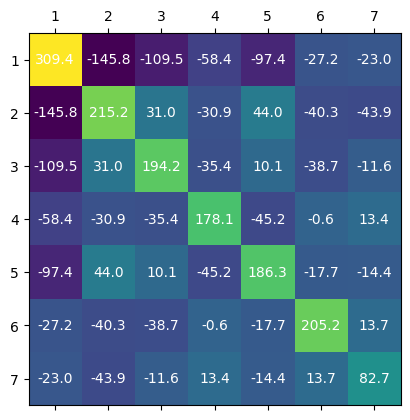

In [151]:
clusterMatrixNo7 = clusterMatrix[:,:7].copy()
rowExp = [np.sum(clusterMatrix[row,0:7])/np.sum(clusterMatrix[:,:7]) for row in range(7)]
colExp = [np.sum(clusterMatrix[:,col])/np.sum(clusterMatrix[:,:7]) for col in range(7)]
total = np.sum(clusterMatrixNo7)
for i in range(7):
    for j in range(7):
        expected = rowExp[i] * colExp[j] * total
        clusterMatrixNo7[i][j] = (clusterMatrix[i][j] - expected) / np.sqrt(expected*(1 - 7/total)*(1 - 7/total))
plt.figure(figsize=(30,30))
plt.matshow(clusterMatrixNo7, cmap='viridis')
plt.grid(False)
for (i, j), val in np.ndenumerate(clusterMatrixNo7):
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='white')
plt.xticks(range(len(xy_labels)), xy_labels)
plt.yticks(range(len(xy_labels)), xy_labels)
plt.savefig(f"./pics/{'simpClusterOverExpMatrix.png' if USE_SIMPLE_DATA else 'rawClusterOverExpMatrix.png'}")

In [152]:
print([np.sum(clusterMatrix[row][0:7]) for row in range(7)], [np.sum(clusterMatrix[:,col]) for col in range(7)])
clusterMatrix


[np.float64(136337.0), np.float64(84757.0), np.float64(59224.0), np.float64(64272.0), np.float64(42950.0), np.float64(23420.0), np.float64(68332.0)] [np.float64(136337.0), np.float64(84757.0), np.float64(59224.0), np.float64(64272.0), np.float64(42950.0), np.float64(23420.0), np.float64(68332.0)]


array([[99716.,  1476.,  2633., 10381.,  1456.,  4445., 16230., 29612.],
       [ 1476., 41334., 13643.,  8069., 11433.,  1547.,  7255., 14419.],
       [ 2633., 13643., 23932.,  4785.,  6045.,   813.,  7373., 12450.],
       [10381.,  8069.,  4785., 25156.,  2328.,  3108., 10445.,  9946.],
       [ 1456., 11433.,  6045.,  2328., 15404.,  1288.,  4996., 14569.],
       [ 4445.,  1547.,   813.,  3108.,  1288.,  8086.,  4133.,  7112.],
       [16230.,  7255.,  7373., 10445.,  4996.,  4133., 17900., 15645.]])

In [153]:

clusterMatrix = np.zeros((7,8))
for i in range(7):
    for j in range(8):
        clusterMatrix[i][j] = np.nanmean(clusterTransfer[i][j])

<Figure size 3000x3000 with 0 Axes>

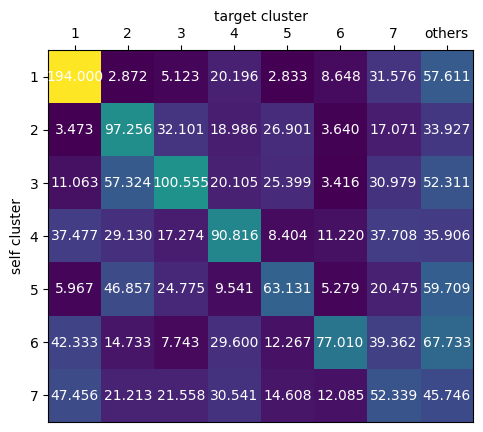

In [154]:
# draw the cluster transfer matrix
plt.figure(figsize=(30,30))
plt.matshow(clusterMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(clusterMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')

x_labels = ['1', '2', '3', '4', '5', '6', '7', 'others']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.grid(False)
plt.savefig(f"./pics/{'simpClusterStrengthMatrix.png' if USE_SIMPLE_DATA else 'rawClusterStrengthMatrix.png'}")

# average transfer connection between clusters

In [155]:
# caculate the cluster transfer matrix
clusterTransfer = [[[] for i in range(8)] for j in range(7)]
for node in G.nodes():
    sumofconnection = 0
    temp = [[] for _ in range(8)]
    if int(G.nodes[node]['cluster']) != 8:
        for neighbor in G.neighbors(node):
            try:
                temp[G.nodes[neighbor]['cluster'] - 1].append(G.edges[node,neighbor]['weight'])
                sumofconnection += G.edges[node,neighbor]['weight']
            except IndexError:
                pass
        for i in range(8):
            temp[i] = np.sum(temp[i])
            clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i]/sumofconnection)
        
    

clusterMatrix = np.zeros((7,8))
for idxr,row in enumerate(clusterTransfer):
    for idxc,colist in enumerate(row):
        clusterMatrix[idxr][idxc] = np.nanmean(colist)
    


/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_39957/1139136770.py:15: RuntimeWarning: invalid value encountered in scalar divide
  clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i]/sumofconnection)


<Figure size 3000x3000 with 0 Axes>

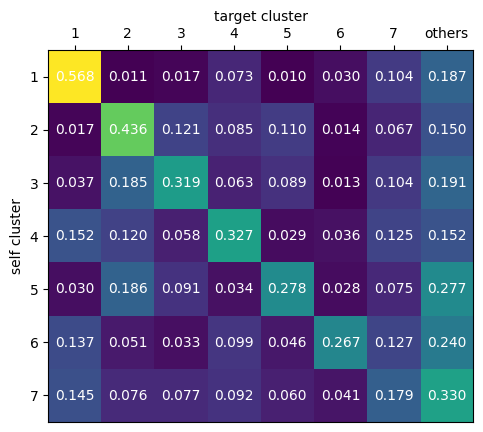

In [156]:
# draw the cluster transfer matrix
plt.figure(figsize=(30,30))
plt.matshow(clusterMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(clusterMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')

x_labels = ['1', '2', '3', '4', '5', '6', '7', 'others']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.grid(False)
plt.savefig(f"./pics/{'simpClusterStrengthMatrix.png' if USE_SIMPLE_DATA else 'rawClusterStrengthMatrix.png'}")

<Figure size 3000x3000 with 0 Axes>

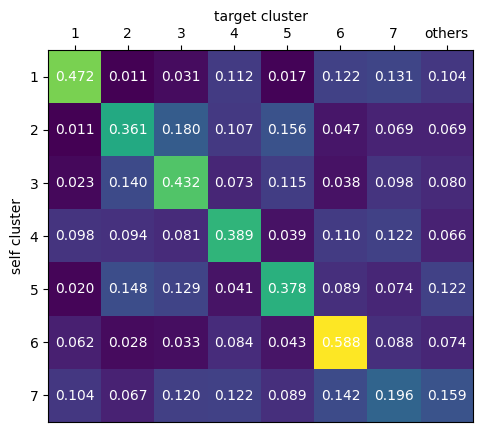

In [157]:
# adjest by size
sizemap = clusterData.groupby('cluster').size().to_dict()
sizemap[8] = len(G.nodes) - len(clusterData)
adjMatrix = np.zeros((7,8))
for i in range(7):
    for j in range(8):
        adjMatrix[i][j] = clusterMatrix[i][j] / sizemap[j+1]
rowsum = np.sum(adjMatrix,axis=1)
for i in range(7):
    for j in range(8):
        adjMatrix[i][j] = adjMatrix[i][j] / rowsum[i]

# draw the cluster transfer matrix
plt.figure(figsize=(30,30))
plt.matshow(adjMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(adjMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.grid(False)
plt.savefig("./pics/adjClusterStrengthMatrix.png" if USE_SIMPLE_DATA else "./pics/rawAdjClusterStrengthMatrix.png")

# caculate the connection inside and outside the cluster

In [158]:
clusterData['incluster'] = None
clusterData['outcluster'] = None
for node in G.nodes():
    incluster, outcluster = 0,0
    selfcluster = G.nodes[node]['cluster']
    for neighbor in G.neighbors(node):
        if G.nodes[neighbor]['cluster'] == selfcluster:
            incluster += G.edges[node,neighbor]['weight']
        else:
            outcluster += G.edges[node,neighbor]['weight']
    cleaned_code = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
    try:
        cleaned_code = int(cleaned_code)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code,'incluster' ] = incluster/(incluster + outcluster)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code,'outcluster'] = outcluster/(incluster + outcluster)
    except:
        pass
            
    
    

# add centerity 

In [159]:
centerity = nx.eigenvector_centrality(G)
clusterData['eigenCentrality'] = None
for node in G.nodes():
    cleaned_code = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
    try:
        cleaned_code = int(cleaned_code)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code,'eigenCentrality'] = centerity[node]
    except:
        pass

In [160]:
clusterData.head()

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0        1812          0          0          0          0          0  30.0   
1        1858         12          0          0          0          0  10.0   
2        1892         12          0          0          0          0  10.0   
3        1719         12          0          0          0          0   3.0   
4        1461         12          0          0          0          0  10.0   

   英文倍率  數學倍率  社會倍率  ...  自設科目組合倍率  unitier  預定甄試人數  甄試費用 口試佔比 書審佔比  cluster  \
0  30.0  30.0  30.0  ...       0.0        1     255     0  0.0  0.0        7   
1  30.0  30.0  30.0  ...       0.0        1      50   480  0.6  0.0        5   
2  30.0  30.0  30.0  ...       0.0        2      80   480  0.6  0.0        5   
3  30.0  30.0  30.0  ...       0.0        2     135   680  0.4  0.2        5   
4  30.0  30.0  30.0  ...       0.0        2      50   480  0.0  0.8        5   

   incluster  outcluster  eigenCentrality  
0       None        None              0.0  
1   0.280899    0.719101         0.004898  
2   0.316129    0.683871         0.008268  
3   0.249315    0.750685         0.029054  
4   0.265306    0.734694         0.006435  

[5 rows x 33 columns]

# add cluster centerity


In [161]:
subgraphs = [G.subgraph([node for node in G.nodes if G.nodes[node]['cluster'] == i]) for i in range(1,8)]
centertys = [nx.eigenvector_centrality(G) for G in subgraphs]
clusterData['clusterEigenCentrality'] = None
for i in range(1,8):
    for node in subgraphs[i-1].nodes():
        cleaned_code = node.replace("check_","").replace("_NO_1_109_0_3.html","").replace("music_dep_","").replace("_NO_0_109_0_3.html","").replace("_NO_1_109_1_3.html","")
        try:
            cleaned_code = int(cleaned_code)
            clusterData.loc[clusterData['學系代碼'] == cleaned_code,'clusterEigenCentrality'] = centertys[i-1][node]
        except:
            pass

In [162]:
clusterData

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0           1812          0          0          0          0          0  30.0   
1           1858         12          0          0          0          0  10.0   
2           1892         12          0          0          0          0  10.0   
3           1719         12          0          0          0          0   3.0   
4           1461         12          0          0          0          0  10.0   
...          ...        ...        ...        ...        ...        ...   ...   
2149         911          0          0         25          0          0  30.0   
2150        1031          0          0         50          0          0  30.0   
2151        1106          0          0         50          0          0  30.0   
2152        1181          0          0         50          0          0   3.0   
2153        1197          0         50          0          0          0   3.0   

      英文倍率  數學倍率  社會倍率  ...  unitier  預定甄試人數  甄試費用  口試佔比 書審佔比 cluster  \
0     30.0  30.0  30.0  ...        1     255     0   0.0  0.0       7   
1     30.0  30.0  30.0  ...        1      50   480   0.6  0.0       5   
2     30.0  30.0  30.0  ...        2      80   480   0.6  0.0       5   
3     30.0  30.0  30.0  ...        2     135   680   0.4  0.2       5   
4     30.0  30.0  30.0  ...        2      50   480   0.0  0.8       5   
...    ...   ...   ...  ...      ...     ...   ...   ...  ...     ...   
2149  30.0  30.0  30.0  ...        3     207  1000   0.3  0.2       7   
2150  30.0   7.0  30.0  ...        2      21   800   0.0  0.5       6   
2151  30.0  30.0  30.0  ...        2     249   800   0.0  0.5       7   
2152   3.0   3.0  30.0  ...        2     282   800   0.0  0.5       1   
2153   8.0  30.0  30.0  ...        2      57  1000   0.4  0.2       3   

      incluster  outcluster  eigenCentrality  clusterEigenCentrality  
0          None        None              0.0                     0.0  
1      0.280899    0.719101         0.004898                0.019369  
2      0.316129    0.683871         0.008268                0.045326  
3      0.249315    0.750685         0.029054                0.100025  
4      0.265306    0.734694         0.006435                0.017498  
...         ...         ...              ...                     ...  
2149    0.21375     0.78625         0.034152                0.154129  
2150       0.16        0.84          0.00431                0.023571  
2151    0.22208     0.77792         0.022977                0.095491  
2152   0.199267    0.800733         0.025563                0.034712  
2153   0.551515    0.448485         0.018221                0.079186  

[2154 rows x 34 columns]

# visualize the cluster connection

In [163]:
clustersum = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        clustersum[i][j] = np.nansum(clusterTransfer[i][j])

1 1 291.37931979290477
1 2 5.658690582052955
1 3 8.69733967569292
1 4 37.356714570052134
1 5 5.092260131297493
1 6 15.623290109474093
1 7 53.215118564839315
2 1 7.0200306010426985
2 2 185.38998286672995
2 3 51.62455444647536
2 4 36.125364942158335
2 5 46.727148219244384
2 6 6.077183311910121
2 7 28.36702563406072
3 1 8.827192252362439
3 2 43.991776785387756
3 3 75.92483278258487
3 4 14.99665587701049
3 5 21.099357955203956
3 6 3.026910404567364
3 7 24.637695811274117
4 1 42.22201972169359
4 2 33.243784835600664
4 3 16.127569096537627
4 4 90.57398404161029
4 5 8.093541656450556
4 6 9.83738988067784
4 7 34.72557788382006
5 1 7.210374040414731
5 2 44.86251297799066
5 3 21.990142562135965
5 4 8.263488629168926
5 5 67.04369889004496
5 6 6.774912377260509
5 7 17.99051299145676
6 1 14.376017940766996
6 2 5.381002384455183
6 3 3.466692508280005
6 4 10.421637803771901
6 5 4.785181695735686
6 6 28.01413886729979
6 7 13.365379118625452
7 1 47.04361022140749
7 2 24.667011229903984
7 3 24.962736957

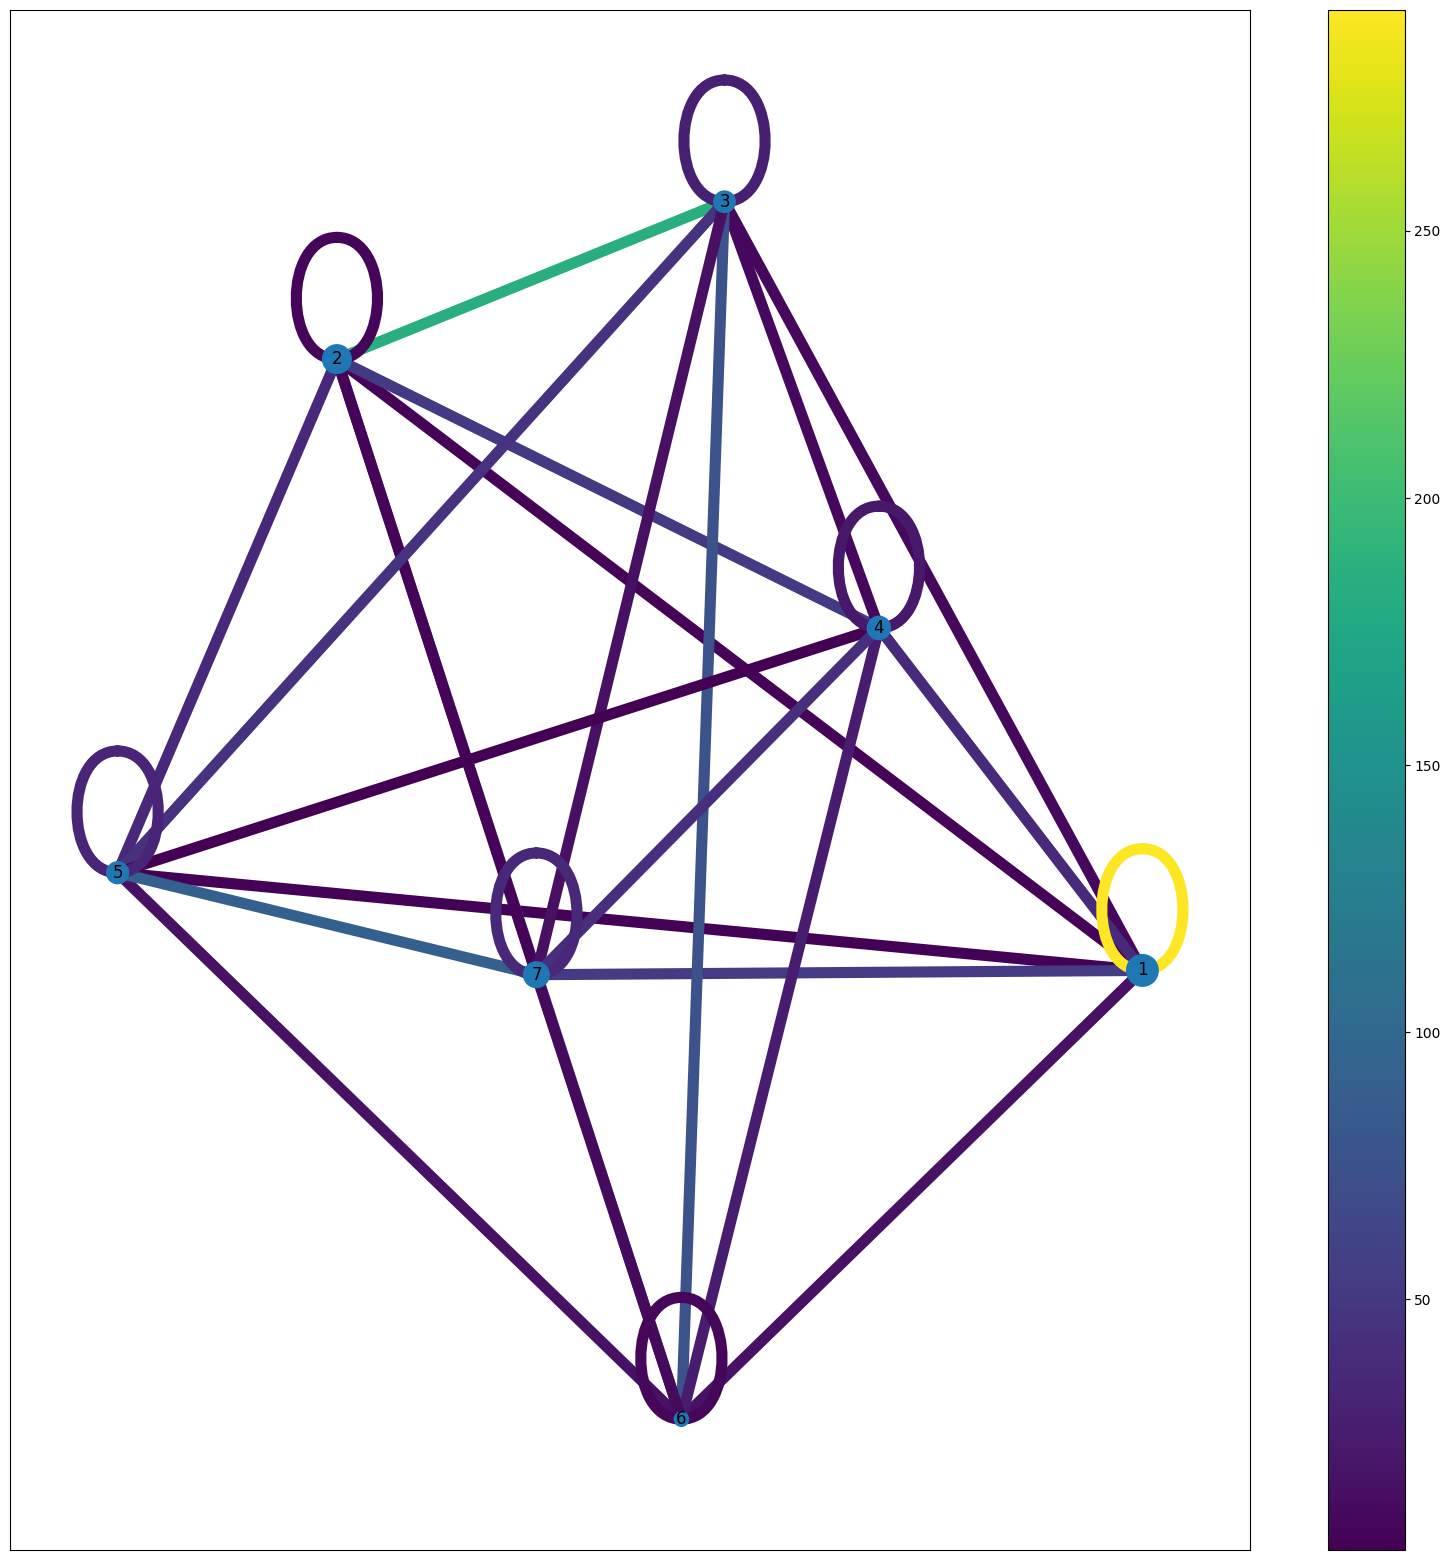

<Figure size 640x480 with 0 Axes>

In [164]:
plt.figure(figsize=(20,20))
Gcluster = nx.Graph()
pos = {}
for i in range(7):
    for j in range(7):
        Gcluster.add_edge(i+1,j+1,weight=clustersum[i][j])
        print(i+1,j+1,clustersum[i][j])
    pos[i+1] = clusterData.loc[clusterData['cluster'] == i+1,['tsnepos1','tsnepos2']].mean().values
node_options = {
    'node_size': [clusterData.loc[clusterData['cluster'] == i+1].shape[0] for i in range(7)],
    'nodelist': [i+1 for i in range(7)]
}
edge_weights = [clustersum[u][v] for u in range(7) for v in range(7)]

norm = plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_colors = [plt.cm.viridis(norm(w)) for w in edge_weights]
nx.draw_networkx_nodes(Gcluster, pos=pos, **node_options)

pathcollection = nx.draw_networkx_edges(
    Gcluster,
    pos=pos,
    edge_color=edge_colors,
    width = 8
)


# 5. 画标签
label_options = {}
nx.draw_networkx_labels(Gcluster, pos=pos, **label_options)


sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm,ax = plt.gca())

plt.show()

plt.savefig(f"./pics/{'simpClusterConnection.png' if USE_SIMPLE_DATA else 'rawClusterConnection.png'}")

In [108]:
for edge_ in Gcluster.edges:
    print(edge_,Gcluster.edges[edge_])

(1, 1) {'weight': np.float64(291.37931979290477)}
(1, 2) {'weight': np.float64(7.0200306010426985)}
(1, 3) {'weight': np.float64(8.827192252362439)}
(1, 4) {'weight': np.float64(42.22201972169359)}
(1, 5) {'weight': np.float64(7.210374040414731)}
(1, 6) {'weight': np.float64(14.376017940766996)}
(1, 7) {'weight': np.float64(47.04361022140749)}
(2, 2) {'weight': np.float64(185.38998286672995)}
(2, 3) {'weight': np.float64(43.991776785387756)}
(2, 4) {'weight': np.float64(33.243784835600664)}
(2, 5) {'weight': np.float64(44.86251297799066)}
(2, 6) {'weight': np.float64(5.381002384455183)}
(2, 7) {'weight': np.float64(24.667011229903984)}
(3, 3) {'weight': np.float64(75.92483278258487)}
(3, 4) {'weight': np.float64(16.127569096537627)}
(3, 5) {'weight': np.float64(21.990142562135965)}
(3, 6) {'weight': np.float64(3.466692508280005)}
(3, 7) {'weight': np.float64(24.96273695758889)}
(4, 4) {'weight': np.float64(90.57398404161029)}
(4, 5) {'weight': np.float64(8.263488629168926)}
(4, 6) {'we

# incluster 108

In [109]:
path = "/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes"
os.chdir(path)

# load the data
departmentDict108 = {}
with open("./rawData/cross108/university.json") as f:
    universityDict = json.load(f)
for Ukey, Uvalue in universityDict.items():
    with open(f"./rawData/cross108/{Ukey}.json") as f:
        department = json.load(f)
    for Skey, Svalue in department.items():
        departmentDict108[f"{Ukey}_{Skey}"] = Svalue


In [110]:

# reverse the key and value
rev_departmentDict108 = {v: list(k.split('_')) for k, v in departmentDict108.items()}

In [111]:
clusterData

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0           1812          0          0          0          0          0  30.0   
1           1858         12          0          0          0          0  10.0   
2           1892         12          0          0          0          0  10.0   
3           1719         12          0          0          0          0   3.0   
4           1461         12          0          0          0          0  10.0   
...          ...        ...        ...        ...        ...        ...   ...   
2149         911          0          0         25          0          0  30.0   
2150        1031          0          0         50          0          0  30.0   
2151        1106          0          0         50          0          0  30.0   
2152        1181          0          0         50          0          0   3.0   
2153        1197          0         50          0          0          0   3.0   

      英文倍率  數學倍率  社會倍率  ...  unitier  預定甄試人數  甄試費用  口試佔比 書審佔比 cluster  \
0     30.0  30.0  30.0  ...        1     255     0   0.0  0.0       7   
1     30.0  30.0  30.0  ...        1      50   480   0.6  0.0       5   
2     30.0  30.0  30.0  ...        2      80   480   0.6  0.0       5   
3     30.0  30.0  30.0  ...        2     135   680   0.4  0.2       5   
4     30.0  30.0  30.0  ...        2      50   480   0.0  0.8       5   
...    ...   ...   ...  ...      ...     ...   ...   ...  ...     ...   
2149  30.0  30.0  30.0  ...        3     207  1000   0.3  0.2       7   
2150  30.0   7.0  30.0  ...        2      21   800   0.0  0.5       6   
2151  30.0  30.0  30.0  ...        2     249   800   0.0  0.5       7   
2152   3.0   3.0  30.0  ...        2     282   800   0.0  0.5       1   
2153   8.0  30.0  30.0  ...        2      57  1000   0.4  0.2       3   

      incluster  outcluster  eigenCentrality  clusterEigenCentrality  
0          None        None              0.0                     0.0  
1      0.280899    0.719101         0.004898                0.019369  
2      0.316129    0.683871         0.008268                0.045326  
3      0.249315    0.750685         0.029054                0.100025  
4      0.265306    0.734694         0.006435                0.017498  
...         ...         ...              ...                     ...  
2149    0.21375     0.78625         0.034152                0.154129  
2150       0.16        0.84          0.00431                0.023571  
2151    0.22208     0.77792         0.022977                0.095491  
2152   0.199267    0.800733         0.025563                0.034712  
2153   0.551515    0.448485         0.018221                0.079186  

[2154 rows x 34 columns]

In [112]:
# transfer to networkx Graph
with open("./rawData/cross108/students.json") as f:
    studentDict = json.load(f)
cluster  = dict()
G108 = nx.Graph()
it = 0
for key,val in departmentDict.items():
    G108.add_node(val,cnname=key)
for dep in studentDict:
    for head, tail in dep.items():
        for link,weight  in tail.items():
            G108.add_edge(head,link,weight=weight) 

In [113]:
clusterMap108 = {f"{row['學系代碼']:06d}":row['cluster'] for idx,row in clusterData.iterrows()}

In [114]:
for node in G108.nodes:
    node_ = node.replace("check_","").replace("_NO_1_108_0_3.html","").replace("music_dep_","").replace("_NO_0_108_0_3.html","").replace("_NO_1_108_1_3.html","")
    try :
        G108.nodes[node]['cluster'] = clusterMap108[node_]
    except:
        G108.nodes[node]['cluster'] = 8
    try:
        G108.nodes[node]['code'] = node_
    except:
        G108.nodes[node]['code'] = None

In [115]:
clusterData['incluster108'] = None
clusterData['outcluster108'] = None
for node in G108.nodes():
    incluster, outcluster = 0,0
    selfcluster = G108.nodes[node]['cluster']
    failnum = 0
    print(selfcluster)
    print(node)
    for neighbor in G108.neighbors(node):
        if G108.nodes[neighbor]['cluster'] == selfcluster:
            incluster += G108.edges[node,neighbor]['weight']
        else:
            outcluster += G108.edges[node,neighbor]['weight']
    #cleaned_code = node.replace("check_","").replace("_NO_1_108_0_3.html","").replace("music_dep_","").replace("_NO_0_108_0_3.html","").replace("_NO_1_108_1_3.html","").replace("_NO_0_108_1_3.html","").replace("__1_108__3.html","").replace("__1_108__3.html","")
    #print(cleaned_code)
    try:
        #cleaned_code = int(cleaned_code)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'incluster108' ] = incluster/(incluster + outcluster)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'outcluster108'] = outcluster/(incluster + outcluster)
        university,department = rev_departmentDict108[node]
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2,'incluster108' ] = incluster/(incluster + outcluster)
        clusterData.loc[mask1 & mask2,'outcluster108'] = outcluster/(incluster + outcluster)
        # show the index that mask1, 2 is not true then failnum +1
        if (mask1 & mask2).index() == []:
            failnum += 1
    except:
        pass


8
check_001012_NO_1_109_0_3.html
8
check_001022_NO_1_109_0_3.html
8
check_001032_NO_1_109_0_3.html
8
check_001042_NO_1_109_0_3.html
8
check_001052_NO_1_109_0_3.html
8
check_001062_NO_1_109_0_3.html
8
check_001072_NO_1_109_0_3.html
8
check_001082_NO_1_109_0_3.html
8
check_001092_NO_1_109_0_3.html
8
check_001102_NO_1_109_0_3.html
8
check_001112_NO_1_109_0_3.html
8
check_001122_NO_1_109_0_3.html
8
check_001132_NO_1_109_0_3.html
8
check_001142_NO_1_109_0_3.html
8
check_001152_NO_1_109_0_3.html
8
check_001162_NO_1_109_0_3.html
8
check_001172_NO_1_109_0_3.html
8
check_001182_NO_1_109_0_3.html
8
check_001192_NO_1_109_0_3.html
8
check_001202_NO_1_109_0_3.html
8
check_001212_NO_1_109_0_3.html
8
check_001222_NO_1_109_0_3.html
8
check_001232_NO_1_109_0_3.html
8
check_001242_NO_1_109_0_3.html
8
check_001252_NO_1_109_0_3.html
8
check_001262_NO_1_109_0_3.html
8
check_001272_NO_1_109_0_3.html
8
check_001282_NO_1_109_0_3.html
8
check_001292_NO_1_109_0_3.html
8
check_001302_NO_1_109_0_3.html
8
check_00

In [116]:
clusterData.head(100)

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0         1812          0          0          0          0          0  30.0   
1         1858         12          0          0          0          0  10.0   
2         1892         12          0          0          0          0  10.0   
3         1719         12          0          0          0          0   3.0   
4         1461         12          0          0          0          0  10.0   
..         ...        ...        ...        ...        ...        ...   ...   
95        1607         50          0          0          0          0   3.0   
96        1615         50          0          0          0          0   3.0   
97        1723          0          0         50          0          0  30.0   
98        1914         50          0          0          0          0   3.0   
99         526         50         50         50          0         50   4.0   

    英文倍率  數學倍率  社會倍率  ...  甄試費用  口試佔比  書審佔比  cluster incluster outcluster  \
0   30.0  30.0  30.0  ...     0  0.00  0.00        7      None       None   
1   30.0  30.0  30.0  ...   480  0.60  0.00        5  0.280899   0.719101   
2   30.0  30.0  30.0  ...   480  0.60  0.00        5  0.316129   0.683871   
3   30.0  30.0  30.0  ...   680  0.40  0.20        5  0.249315   0.750685   
4   30.0  30.0  30.0  ...   480  0.00  0.80        5  0.265306   0.734694   
..   ...   ...   ...  ...   ...   ...   ...      ...       ...        ...   
95  30.0  30.0  30.0  ...     0  0.00  0.50        5      None       None   
96  30.0  30.0  30.0  ...     0  0.00  0.50        5      None       None   
97  30.0   3.0  30.0  ...     0  0.00  0.50        6      None       None   
98  30.0  30.0  30.0  ...     0  0.00  0.50        5      None       None   
99   5.0   4.0  30.0  ...  1000  0.25  0.25        1  0.635556   0.364444   

    eigenCentrality  clusterEigenCentrality  incluster108  outcluster108  
0               0.0                     0.0          None           None  
1          0.004898                0.019369          None           None  
2          0.008268                0.045326      0.156463       0.843537  
3          0.029054                0.100025      0.196825       0.803175  
4          0.006435                0.017498          None           None  
..              ...                     ...           ...            ...  
95             None                    None          None           None  
96             None                    None          None           None  
97             None                    None          None           None  
98             None                    None          None           None  
99         0.014312                0.049596      0.630435       0.369565  

[100 rows x 36 columns]

# 108 centerity

In [117]:
centerity = nx.eigenvector_centrality(G108)
clusterData['eigenCentrality108'] = None
for node in G108.nodes():
    #cleaned_code = node.replace("check_","").replace("_NO_1_108_0_3.html","").replace("music_dep_","").replace("_NO_0_108_0_3.html","").replace("_NO_1_108_1_3.html","")
    try:
        #cleaned_code = int(cleaned_code)
        university,department = rev_departmentDict108[node]
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2,'eigenCentrality108'] = centerity[node]
    except:
        pass

# add cluster centerity 108

In [118]:
subgraphs = [G108.subgraph([node for node in G108.nodes if G108.nodes[node]['cluster'] == i]) for i in range(1,8)]
centertys = [nx.eigenvector_centrality(G108) for G108 in subgraphs]
clusterData['clusterEigenCentrality108'] = None
for i in range(1,8):
    for node in subgraphs[i-1].nodes():
        #cleaned_code = node.replace("check_","").replace("_NO_1_108_0_3.html","").replace("music_dep_","").replace("_NO_0_108_0_3.html","").replace("_NO_1_108_1_3.html","")
        try:
            print(node)
            #cleaned_code = int(cleaned_code)
            university,department = rev_departmentDict108[node]
            print(university,department)
            mask1 = clusterData['學校名稱_encoded'] == university
            mask2 = clusterData['學系名稱_trim'] == department
            clusterData.loc[mask1 & mask2,'clusterEigenCentrality108'] = centertys[i-1][node]
            print(clusterData.loc[mask1 & mask2,['clusterEigenCentrality108','學校名稱_encoded','學系名稱_trim']])
        except:
            pass

check_004262_NO_1_108_0_3.html
國立成功大學 統計學系
    clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
884                  0.026964       國立成功大學      統計學系
check_030062_NO_1_108_0_3.html
長庚大學 物理治療學系
    clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
104                  0.063056         長庚大學    物理治療學系
check_022042_NO_1_108_0_3.html
國立高雄師範大學 物理學系
     clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
1218                  0.014265     國立高雄師範大學      物理學系
check_051472_NO_1_108_0_3.html
長榮大學 環境與食品安全檢驗學士學位學程食品檢驗組
    clusterEigenCentrality108 學校名稱_encoded             學系名稱_trim
156                  0.002474         長榮大學  環境與食品安全檢驗學士學位學程食品檢驗組
check_004082_NO_1_108_0_3.html
國立成功大學 地球科學系
    clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
888                  0.059475       國立成功大學     地球科學系
check_009092_NO_1_108_0_3.html
東海大學 化學系化學組
     clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
2036                   0.01075         東海大學    化學系化學組
check_020172_NO_1_108_0_3.html
輔仁大學 數學系資訊數學組
    clusterEigen

# incluster107


In [119]:
path = "/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes"
os.chdir(path)

# load the data
departmentDict = {}
with open("./rawData/cross107/university.json") as f:
    universityDict = json.load(f)
for Ukey, Uvalue in universityDict.items():
    with open(f"./rawData/cross107/{Ukey}.json") as f:
        department = json.load(f)
    for Skey, Svalue in department.items():
        departmentDict[f"{Ukey}_{Skey}"] = Svalue


In [120]:
# reverse the key and value
rev_departmentDict107 = {v: list(k.split('_')) for k, v in departmentDict.items()}

In [121]:
# transfer to networkx Graph
with open("./rawData/cross107/students.json") as f:
    studentDict = json.load(f)
cluster  = dict()
G107 = nx.Graph()
it = 0
for key,val in departmentDict.items():
    G107.add_node(val,cnname=key)
for dep in studentDict:
    for head, tail in dep.items():
        for link,weight  in tail.items():
            G107.add_edge(head,link,weight=weight)

In [122]:
clusterMap107 = {f"{row['學系代碼']:06d}":row['cluster'] for idx,row in clusterData.iterrows()}

In [123]:
for node in G107.nodes:
    node_ = node.replace("check_","").replace("_NO_1_107_0_3.html","").replace("music_dep_","").replace("_NO_0_107_0_3.html","").replace("_NO_1_107_1_3.html","")
    try :
        G107.nodes[node]['cluster'] = clusterMap107[node_]
    except:
        G107.nodes[node]['cluster'] = 8
    try:
        G107.nodes[node]['code'] = node_
    except:
        G107.nodes[node]['code'] = None

In [124]:
clusterData['incluster107'] = None
clusterData['outcluster107'] = None
for node in G107.nodes():
    incluster, outcluster = 0,0
    selfcluster = G107.nodes[node]['cluster']
    print(selfcluster)
    print(node)
    for neighbor in G107.neighbors(node):
        if G107.nodes[neighbor]['cluster'] == selfcluster:
            incluster += G107.edges[node,neighbor]['weight']
        else:
            outcluster += G107.edges[node,neighbor]['weight']
    #cleaned_code = node.replace("check_","").replace("_NO_1_107_0_3.html","").replace("music_dep_","").replace("_NO_0_107_0_3.html","").replace("_NO_1_107_1_3.html","").replace("_NO_0_107_1_3.html","").replace("__1_107__3.html","").replace("__1_107__3.html","")
    #print(cleaned_code)
    try:
        #cleaned_code = int(cleaned_code)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'incluster107' ] = incluster/(incluster + outcluster)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'outcluster107'] = outcluster/(incluster + outcluster)
        university,department = rev_departmentDict107[node]
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2,'incluster107' ] = incluster/(incluster + outcluster)
        clusterData.loc[mask1 & mask2,'outcluster107'] = outcluster/(incluster + outcluster)
        
    except:
        pass

2
check_001012_NO_1_107_0_3.html
2
check_001022_NO_1_107_0_3.html
2
check_001032_NO_1_107_0_3.html
4
check_001042_NO_1_107_0_3.html
2
check_001052_NO_1_107_0_3.html
2
check_001062_NO_1_107_0_3.html
2
check_001072_NO_1_107_0_3.html
2
check_001082_NO_1_107_0_3.html
1
check_001092_NO_1_107_0_3.html
4
check_001102_NO_1_107_0_3.html
1
check_001112_NO_1_107_0_3.html
1
check_001122_NO_1_107_0_3.html
1
check_001132_NO_1_107_0_3.html
4
check_001142_NO_1_107_0_3.html
1
check_001152_NO_1_107_0_3.html
2
check_001162_NO_1_107_0_3.html
2
check_001172_NO_1_107_0_3.html
2
check_001182_NO_1_107_0_3.html
6
check_001192_NO_1_107_0_3.html
2
check_001202_NO_1_107_0_3.html
2
check_001212_NO_1_107_0_3.html
1
check_001222_NO_1_107_0_3.html
1
check_001232_NO_1_107_0_3.html
1
check_001242_NO_1_107_0_3.html
1
check_001252_NO_1_107_0_3.html
1
check_001262_NO_1_107_0_3.html
1
check_001272_NO_1_107_0_3.html
1
check_001282_NO_1_107_0_3.html
1
check_001292_NO_1_107_0_3.html
1
check_001302_NO_1_107_0_3.html
1
check_00

# 107 centerity

In [125]:
centerity = nx.eigenvector_centrality(G107)
clusterData['eigenCentrality107'] = None
for node in G107.nodes():
    #cleaned_code = node.replace("check_","").replace("_NO_1_107_0_3.html","").replace("music_dep_","").replace("_NO_0_107_0_3.html","").replace("_NO_1_107_1_3.html","")
    try:
        #cleaned_code = int(cleaned_code)
        university,department = rev_departmentDict107[node]
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2,'eigenCentrality107'] = centerity[node]
    except:
        pass

# add cluster centerity 107

In [126]:
subgraphs = [G107.subgraph([node for node in G107.nodes if G107.nodes[node]['cluster'] == i]) for i in range(1,8)]
centertys = [nx.eigenvector_centrality(G107) for G107 in subgraphs]
clusterData['clusterEigenCentrality107'] = None
for i in range(1,8):
    for node in subgraphs[i-1].nodes():
        print(node)
        #cleaned_code = node.replace("check_","").replace("_NO_1_107_0_3.html","").replace("music_dep_","").replace("_NO_0_107_0_3.html","").replace("_NO_1_107_1_3.html","")
        try:
            #cleaned_code = int(cleaned_code)
            #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'clusterEigenCentrality107'] = centertys[i-1][node]
            university,department = rev_departmentDict107[node]
            mask1 = clusterData['學校名稱_encoded'] == university
            mask2 = clusterData['學系名稱_trim'] == department
            clusterData.loc[mask1 & mask2,'clusterEigenCentrality107'] = centertys[i-1][node]
            print(clusterData.loc[mask1 & mask2,['clusterEigenCentrality107','學校名稱_encoded','學系名稱_trim']])
        except:
            pass

check_015082_NO_1_107_0_3.html
    clusterEigenCentrality107 學校名稱_encoded  學系名稱_trim
453                  0.004185         逢甲大學  國際經營與貿易學系
music_dep_034362_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
1154                       0.0       國立東華大學    音樂學系甲組
check_014402_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded       學系名稱_trim
2000                  0.007171         淡江大學  機械與機電工程學系精密機械組
check_108172_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
2081                   0.02596         慈濟大學  醫學系(公費生)
check_027072_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
1292                  0.019156       國立中山大學     應用數學系
check_025022_NO_1_107_0_3.html
Empty DataFrame
Columns: [clusterEigenCentrality107, 學校名稱_encoded, 學系名稱_trim]
Index: []
check_018222_NO_1_107_0_3.html
Empty DataFrame
Columns: [clusterEigenCentrality107, 學校名稱_encoded, 學系名稱_trim]
Index: []
check_100342_NO_1_107_0_3.html
     clusterEigenCen

In [127]:
print(
    clusterData.incluster107.value_counts(dropna = False)[None],
    clusterData.incluster108.value_counts(dropna = False)[None],
    clusterData.incluster.value_counts(dropna = False)[None],
)

611 373 31


# public or private

In [128]:
isPublic = clusterData.學校名稱_encoded.map(lambda x :1 if '公立' in x or '國立' in x else 0)
clusterData['isPublic'] = isPublic

# add position 

In [129]:
schoolPos = pd.read_csv('./rawData/schoolPosition.csv')
schoolPos

school position  is_city
0          國立臺灣海洋大學      基隆市        1
1            國立臺灣大學      台北市        1
2          國立臺灣師範大學      台北市        1
3          國立臺灣科技大學      台北市        1
4    國立陽明交通大學(臺北校區)      台北市        1
..              ...      ...      ...
96             慈濟大學      花蓮縣        0
97           慈濟科技大學      花蓮縣        0
98           國立臺東大學      台東縣        0
99         國立澎湖科技大學      澎湖縣        0
100          國立金門大學      金門縣        0

[101 rows x 3 columns]

In [130]:
clusterData['position'] = None
clusterData['isCity'] = None
for idx,row in schoolPos.iterrows():
    try:
        temp = clusterData[clusterData['學校名稱_encoded'] == row['school']]
        for idx_,row_ in temp.iterrows():
            clusterData.loc[idx_,'position'] = row['position']
            clusterData.loc[idx_,'isCity'] = row ['is_city']
    except:
        pass

In [131]:
clusterData

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0           1812          0          0          0          0          0  30.0   
1           1858         12          0          0          0          0  10.0   
2           1892         12          0          0          0          0  10.0   
3           1719         12          0          0          0          0   3.0   
4           1461         12          0          0          0          0  10.0   
...          ...        ...        ...        ...        ...        ...   ...   
2149         911          0          0         25          0          0  30.0   
2150        1031          0          0         50          0          0  30.0   
2151        1106          0          0         50          0          0  30.0   
2152        1181          0          0         50          0          0   3.0   
2153        1197          0         50          0          0          0   3.0   

      英文倍率  數學倍率  社會倍率  ...  outcluster108  eigenCentrality108  \
0     30.0  30.0  30.0  ...           None                None   
1     30.0  30.0  30.0  ...           None                None   
2     30.0  30.0  30.0  ...       0.843537            0.009077   
3     30.0  30.0  30.0  ...       0.803175            0.028867   
4     30.0  30.0  30.0  ...           None                None   
...    ...   ...   ...  ...            ...                 ...   
2149  30.0  30.0  30.0  ...       0.690289             0.03109   
2150  30.0   7.0  30.0  ...       0.982759            0.003734   
2151  30.0  30.0  30.0  ...       0.769826            0.025699   
2152   3.0   3.0  30.0  ...        0.84509             0.02179   
2153   8.0  30.0  30.0  ...       0.495575            0.013076   

      clusterEigenCentrality108  incluster107 outcluster107  \
0                          None          None          None   
1                          None          None          None   
2                      0.034485          None          None   
3                      0.097662          None          None   
4                          None          None          None   
...                         ...           ...           ...   
2149                   0.157276       0.29963       0.70037   
2150                   0.000873      0.037037      0.962963   
2151                   0.114322      0.263341      0.736659   
2152                    0.06356      0.160864      0.839136   
2153                   0.101236          None          None   

     eigenCentrality107  clusterEigenCentrality107  isPublic  position  isCity  
0                  None                       None         0       新北市       1  
1                  None                       None         0       新北市       1  
2                  None                       None         0       新北市       1  
3                  None                       None         0       新北市       1  
4                  None                       None         0       新北市       1  
...                 ...                        ...       ...       ...     ...  
2149           0.029767                   0.130524         0       桃園市       1  
2150           0.002075                   0.000272         0       桃園市       1  
2151           0.018086                   0.087023         0       桃園市       1  
2152           0.023621                   0.074189         0       桃園市       1  
2153               None                       None         0       桃園市       1  

[2154 rows x 45 columns]

# save file


In [132]:
clusterData.drop("Unnamed: 0",axis = 1).to_csv(f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster.csv")

In [133]:
clusterData.count()

Unnamed: 0                   2154
國文檢定_code                    2154
英文檢定_code                    2154
數學檢定_code                    2154
社會檢定_code                    2154
自然檢定_code                    2154
國文倍率                         2154
英文倍率                         2154
數學倍率                         2154
社會倍率                         2154
自然倍率                         2154
tsnepos1                     2154
tsnepos2                     2154
學校名稱_code                    2154
學校名稱_encoded                 2154
學系名稱_trim                    2154
學系代碼                         2154
國文採計                         2154
英文採計                         2154
數學採計                         2154
社會採計                         2154
自然採計                         2154
自設科目組合_code                  2154
自設科目組合倍率                     2154
unitier                      2154
預定甄試人數                       2154
甄試費用                         2154
口試佔比                         2154
書審佔比                         2154
cluster       